In [ ]:
import pandas as pd
import io
from google.colab import files

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout, Bidirectional,Input
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from keras import regularizers
from keras.optimizers import SGD,Adam

In [3]:
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.regularizers import l2
from keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU, Flatten, ReLU
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakibulshezan","key":"d6956859467d11693eb8f842bd380125"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle datasets download -d cryptexcode/banfakenews

 80% 49.0M/61.5M [00:02<00:01, 12.2MB/s]
100% 61.5M/61.5M [00:02<00:00, 22.4MB/s]


In [ ]:
from zipfile import ZipFile
file_name = 'banfakenews.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
real = pd.read_csv('/content/Authentic-48K.csv')
fake = pd.read_csv('/content/Fake-1K.csv')
real.head()

articleID  ... label
0          1  ...     1
1          2  ...     1
2          3  ...     1
3          4  ...     1
4          5  ...     1

[5 rows x 7 columns]

In [ ]:

fake.head()

articleID  ... label
0          1  ...     0
1          2  ...     0
2          3  ...     0
3          4  ...     0
4          5  ...     0

[5 rows x 7 columns]

In [ ]:
df = pd.concat([real,fake])

In [ ]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(df['label']),
                                             df['label']))

weights={}
for index, weight in enumerate(class_weights) :
  weights[index]=weight

In [ ]:
weights

{0: 19.236720554272516, 1: 0.5133427831874768}

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as mp

import scipy
from scipy.stats import spearmanr
from scipy.stats import f_oneway

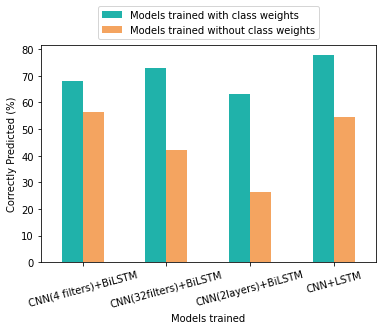

In [20]:
data={"Models trained with class weights":[68,73,63,77.7],"Models trained without class weights":[56.4,42.2,26.2,54.64]}
index = ["CNN(4 filters)+BiLSTM","CNN(32filters)+BiLSTM","CNN(2layers)+BiLSTM","CNN+LSTM"]
dataFrame = pd.DataFrame(data=data, index=index);

 
my_colors = ['lightseagreen','sandybrown']
# Draw a vertical bar chart

dataFrame.plot.bar(rot=15,color=my_colors);
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.ylabel("Correctly Predicted (%)")
plt.xlabel("Models trained")
plt.savefig('/content/sample_data/compund.jpg',bbox_inches='tight')

plt.show(block=True);